In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [278]:
import imp
imp.reload(xy)

<module 'xy' from 'E:\\PyProject\\factors\\RCP\\xy.py'>

In [3]:
import xy

# $因子描述：ivol$

***残差波动***  
衡量日内先"高开低走"程度。

1. 数据：标的分钟行情（**对于指数分钟行情**）  
2. 定义上行阶段和下行阶段：  
    上行：up = 分钟收盘价 - mean > k * std  
    下行：down = 分钟收盘价 + mean < k * std   
3. down的索引中位数 - up的索引中位数,得到当日因子值  

$参考报告：《20220915-东吴证券-金工专题报告:寻找特质波动率中的纯真信息,剔除跨期截面相关性的纯真波动率因子》$

## 计算

In [4]:
xy.rets

,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,...,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25
000001.SZ,NaN,0.011905,-0.051765,0.016129,-0.031746,0.003783,-0.008794,0.006337,-0.028967,-0.005188,...,-0.018503,0.005141,0.000000,-0.013640,-0.000864,-0.020761,0.004417,-0.010554,-0.010667,0.008985
000002.SZ,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.013679,-0.008029,0.017660,-0.000723,-0.015195,-0.022777,0.002256,-0.014254,-0.007610,0.030675
000004.SZ,NaN,0.012927,-0.100051,0.006239,-0.100056,-0.011588,-0.047529,0.039920,-0.057901,0.044143,...,0.050282,-0.025820,-0.033683,0.008571,-0.056657,0.007808,0.032777,0.009810,-0.030286,-0.086623
000006.SZ,NaN,0.024722,-0.098914,0.009371,-0.098143,0.007353,-0.007299,0.019118,-0.024531,0.005917,...,-0.099485,0.028571,0.087037,-0.028961,-0.054386,-0.012987,0.048872,-0.035842,-0.001859,-0.013035
000008.SZ,NaN,0.014124,-0.088208,-0.002037,-0.023469,-0.018809,-0.092652,0.063380,0.012141,-0.006543,...,0.004184,0.004167,0.000000,0.008299,0.041152,-0.023715,-0.016194,-0.024691,-0.021097,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688799.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000253,-0.003543,-0.012700,-0.001801,-0.022680,-0.013713,-0.008021,-0.002695,0.027297,-0.009471
688800.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.020588,-0.032604,-0.026164,0.024135,-0.000889,-0.026702,-0.006401,-0.040957,0.014875,-0.027896
688819.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.047580,0.004620,-0.004886,0.018775,0.013326,-0.007275,-0.002818,-0.028265,-0.017743,-0.005922
688981.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008951,0.003802,0.000631,0.012618,-0.002908,-0.006874,0.023909,-0.019050,0.015243,-0.006582


## 过度自信

In [9]:
xy.filter1

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25
000001.SZ,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000002.SZ,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000004.SZ,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000005.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000006.SZ,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688799.SH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688800.SH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688819.SH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688981.SH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-0.0554602098637406
1 229.83064516129033
2 230.33494623655915
3 230.20967741935485
4 230.29301075268816
5 230.4021505376344
6 230.14301075268818
7 230.19462365591397
8 230.30806451612904
9 230.23655913978496
10 230.66021505376344


<Axes: >

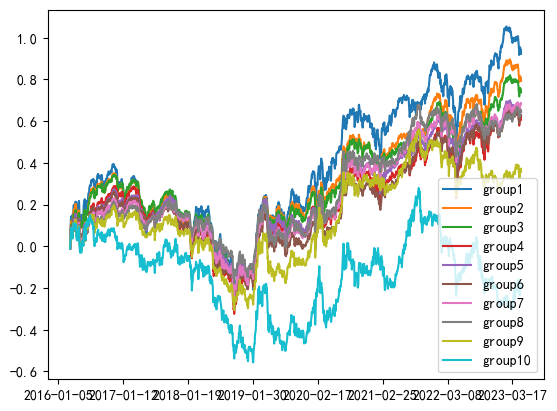

In [97]:
# 分组收益率
gr_RCP = xy.cal_rate_group(
    ((xy.rets* xy.filter1).T.rolling(45).mean().T.shift(1,axis=1)* (xy.rets * xy.filter1).T.rolling(45).std().T.shift(1,axis=1)),
    xy.rets.loc[xy.rets.index.isin(xy.weights1000.index|xy.weights500.index|xy.weights300.index|xy.weights50.index),'2016-01-04':],
    group_num=10,
    masks=1
)
gr_RCP.cumsum().plot()

-0.18511578595149888
1 96.58172043010752
2 97.06290322580645
3 96.97258064516129
4 97.03494623655914
5 97.16774193548387
6 96.88602150537635
7 96.94301075268817
8 97.06451612903226
9 96.97096774193548
10 97.44516129032257


<Axes: >

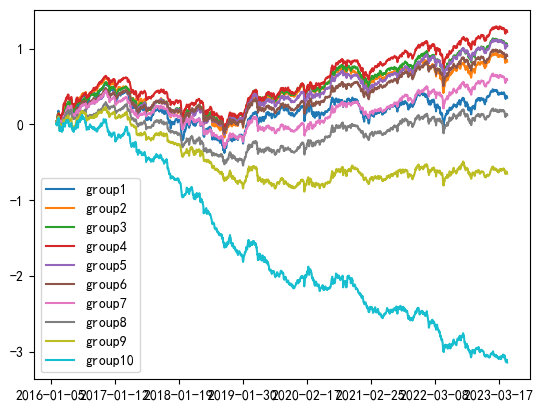

In [96]:
# 分组收益率
gr_RCP = xy.cal_rate_group(
    ((xy.rets * xy.filter1).T.rolling(20).mean().T.shift(1,axis=1) * (xy.rets * xy.filter1).T.rolling(20).std().T.shift(1,axis=1)),
    xy.rets.loc[~xy.rets.index.isin(xy.weights1000.index|xy.weights500.index|xy.weights300.index|xy.weights50.index),'2016-01-04':],
    group_num=10,
    masks=1
)
gr_RCP.cumsum().plot()

<Axes: >

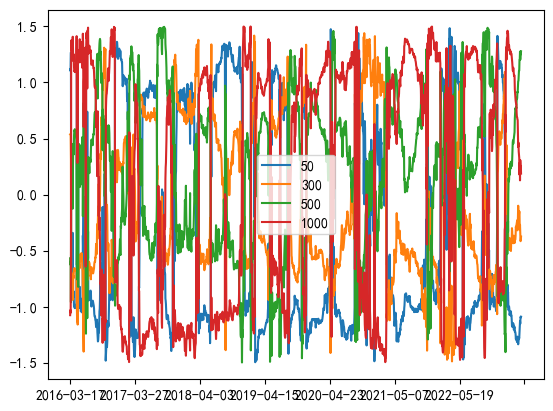

In [99]:
xy.read_Factor(xy.trd_dates,'ss',((xy.rets* xy.filter1).T.rolling(45).mean().T.shift(1,axis=1)* (xy.rets * xy.filter1).T.rolling(45).std().T.shift(1,axis=1))).T.dropna().plot()

-0.006619649057495111
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

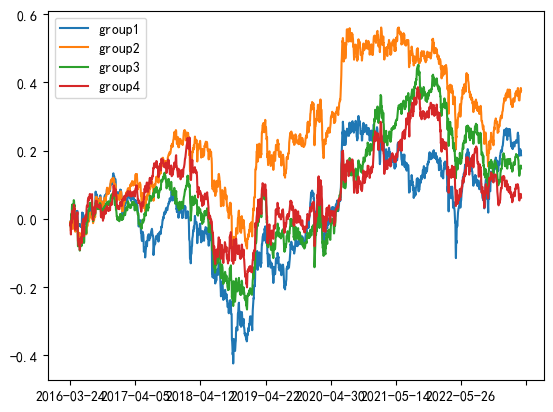

In [106]:
# 分组收益率
gr_iRmom = xy.cal_rate_group(
    xy.read_Factor1(xy.trd_dates,'ss',((xy.rets* xy.filter1).T.rolling(50).mean().T.shift(1,axis=1))).T.dropna().T,
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-04':],
    group_num=4,
    masks=1
)
gr_iRmom.cumsum().plot()

-0.019909238731261037
1 0.9731471535982814
2 0.9731471535982814
3 0.9731471535982814
4 0.9731471535982814


<Axes: >

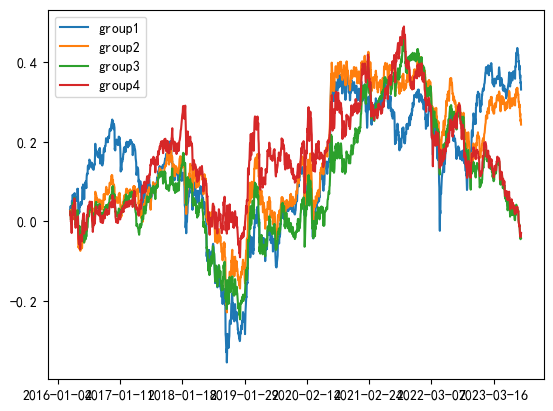

In [102]:
# 分组收益率
gr_iRmom = xy.cal_rate_group(
    (xy.Index_rets.T.rolling(50).mean().T * (xy.Index_rets.T.rolling(50).std().T)).shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-04':],
    group_num=4,
    masks=1
)
gr_iRmom.cumsum().plot()

In [ ]:
# 分组收益率
gr_RCP = xy.cal_rate_group(
    ((xy.rets* xy.filter1).T.rolling(45).mean().T.shift(1,axis=1)* (xy.rets * xy.filter1).T.rolling(45).std().T.shift(1,axis=1)),
    xy.rets.loc[xy.rets.index.isin(xy.weights1000.index|xy.weights500.index|xy.weights300.index|xy.weights50.index),'2016-01-04':],
    group_num=10,
    masks=1
)
gr_RCP.cumsum().plot()

180.0
yoy: 0.23688046761562462 
 mdd: -0.19075979708254442 
 sharpe: 1.4756878308695889 
 rankIC: -0.04795640326975476 
 rankIR: -0.06061741075073869 
 win%: 0.5395095367847411 
 gain_loss%: -1.090215221085238


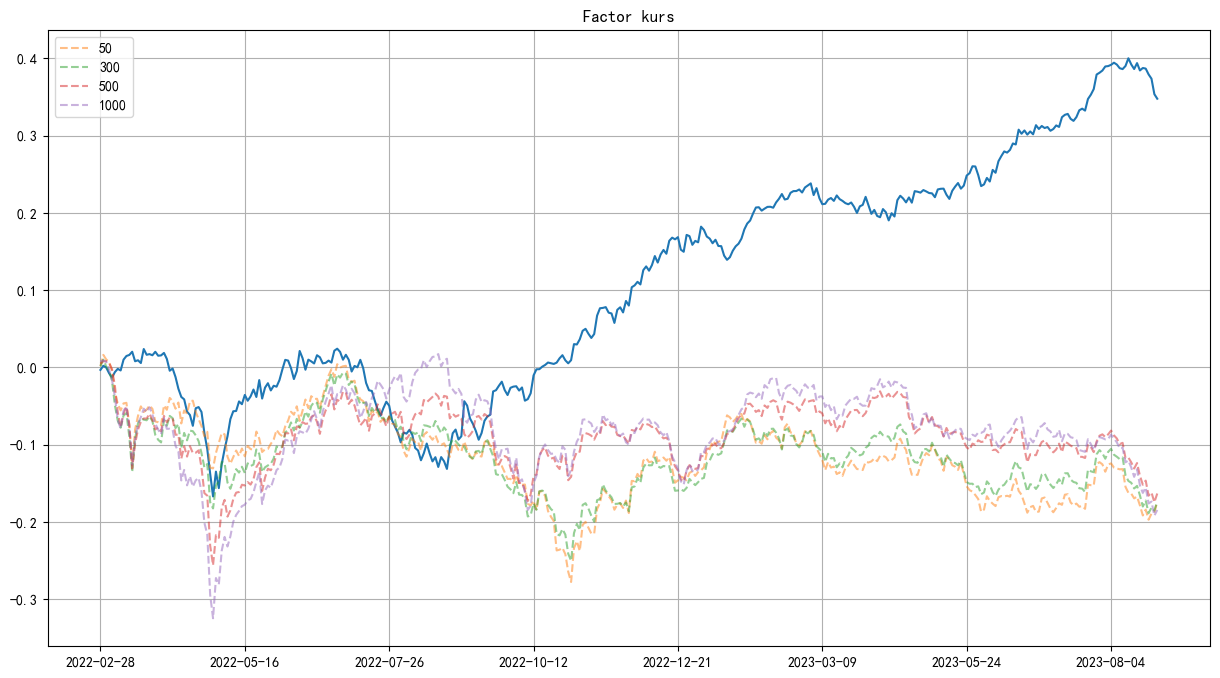

In [93]:
# 单因子强弱
KURScount_select, KURScount_rets = xy.single_Factor_backtest(
    (xy.Index_rets.T.rolling(50).mean().T * (xy.Index_rets.T.rolling(50).std().T)).shift(1,axis=1).loc[['50', '300', '500', '1000'],'2022-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2022-02-28':],
    _side=-1,
    fee=0.000,
    name='kurs'
)

0.0830698176343244
1 0.9966442953020134
2 0.9966442953020134
3 0.9966442953020134
4 0.9966442953020134


<Axes: >

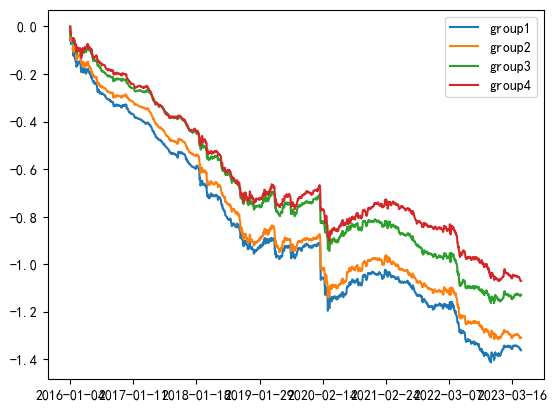

In [727]:
# 分组收益率
gr_CP = xy.cal_rate_group(
    iCP_intraday.shift(0).T,
    (xy.op.loc[:,'2016-01-04':]/xy.pcl.loc[:,'2016-01-04':] - 1),
    group_num=4,
    masks=1
)
gr_CP.cumsum().plot()

In [375]:
idn = '1000'
def cal_rcp(idn, intraday,iCP_intraday, win):
    RCP = {}
    for i, d in tqdm(enumerate(intraday_ret.columns[:-2])):
        x = intraday_ret.loc[idn, :d].iloc[-win:]
        y = iCP_intraday.dropna().T.loc[idn, :d].iloc[-win:]
        if len(y) < win :
            continue
        else:
            X = np.array([x,np.ones(win,)]).T
            r = (np.linalg.lstsq(X, y,rcond=None)[1]/win)[0]**0.5
            RCP[y.index[-1]] = r
    return pd.Series(RCP).shift().rename(idn)
        # break

In [376]:
rcp1000 = cal_rcp('1000', intraday_ret, iCP_intraday, 30)
rcp300 = cal_rcp('300', intraday_ret, iCP_intraday, 30)
rcp500 = cal_rcp('500', intraday_ret, iCP_intraday, 30)
rcp50 = cal_rcp('50', intraday_ret, iCP_intraday, 30)

2061it [00:01, 1338.80it/s]
2061it [00:01, 1335.79it/s]
2061it [00:01, 1359.57it/s]
2061it [00:01, 1348.45it/s]


In [377]:
idx_RCP = pd.concat([
    rcp50.rename('50'),
    rcp300.rename('300'),
    rcp500.rename('500'),
    rcp1000.rename('1000'),
],axis=1)

<Axes: >

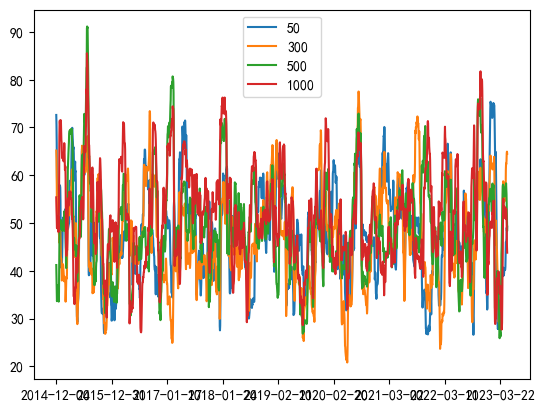

In [378]:
idx_RCP.plot()

0.014684647413294949
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

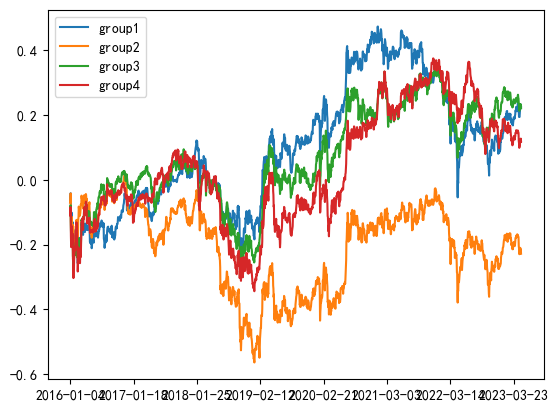

In [787]:
# 分组收益率
gr_RCP = xy.cal_rate_group(
    idx_RCP.rolling(10).mean().T,
    xy.Index_rets.loc[:,'2016-01-04':],
    group_num=4,
    masks=1
)
gr_RCP.cumsum().plot()

### 从股票计算（日频）

In [257]:
stCP_ovnday = xy.closes.T.apply(index_CP_daily,args=(1,))

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('Cannot apply_along_axis when any iteration dimensions are 0')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('Cannot apply_along_axis when any iteration dimensions are 0')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

ValueError('negative dimensions are not allowed')

In [275]:
F = (stCP_ovnday.rolling(20).std().T + stCP_ovnday.rolling(20).mean().T).loc[:,'2016-01-04':].shift(1,axis=1)

0.05030322182499126
1 149.4883215643672
2 149.96849538294404
3 149.88212927756655
4 149.97935904399782
5 150.09777294948398
6 149.7686040195546
7 149.89625203693646
8 149.9652362846279
9 149.88538837588268
10 150.376969038566


<Axes: >

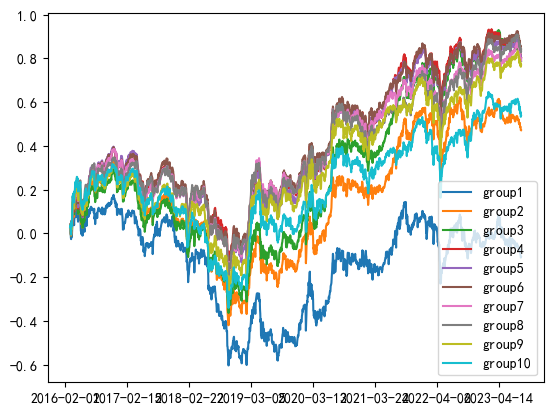

In [ ]:
# 分组收益率
gr_stCP_ovnday = xy.cal_rate_group(
    F.loc[F.index.isin(xy.weights1000.index)],
    xy.rets.loc[:,'2016-01-04':],
    group_num=10,
    masks=1
)
gr_stCP_ovnday.cumsum().plot()

In [ ]:
i

200

In [ ]:
j

239

In [ ]:
idx_name = '500'

<Axes: ylabel='Frequency'>

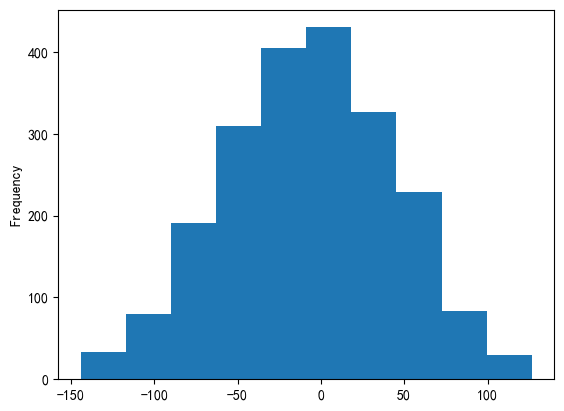

In [ ]:
iCP_intraday[idx_name].dropna().plot(kind='hist')

shrh: [-150, -121] win%: 0.16666666666666666 gainloss%: -0.011887530169837296
shrh: [-120, -91] win%: 0.5 gainloss%: -1.1157203668488413
shrh: [-90, -61] win%: 0.577922077922078 gainloss%: -0.8416404909785503
shrh: [-60, -31] win%: 0.5209003215434084 gainloss%: -0.8135581562063998
shrh: [-30, -1] win%: 0.5256723716381418 gainloss%: -0.8884570387723569
shrh: [0, 29] win%: 0.5339578454332553 gainloss%: -0.8134460094362348
shrh: [30, 59] win%: 0.5478547854785478 gainloss%: -0.7680983345443465
shrh: [60, 89] win%: 0.5233644859813084 gainloss%: -1.0476253782463218
shrh: [90, 119] win%: 0.4117647058823529 gainloss%: -0.7945615654190694
shrh: [120, 149] win%: 1.0 gainloss%: nan


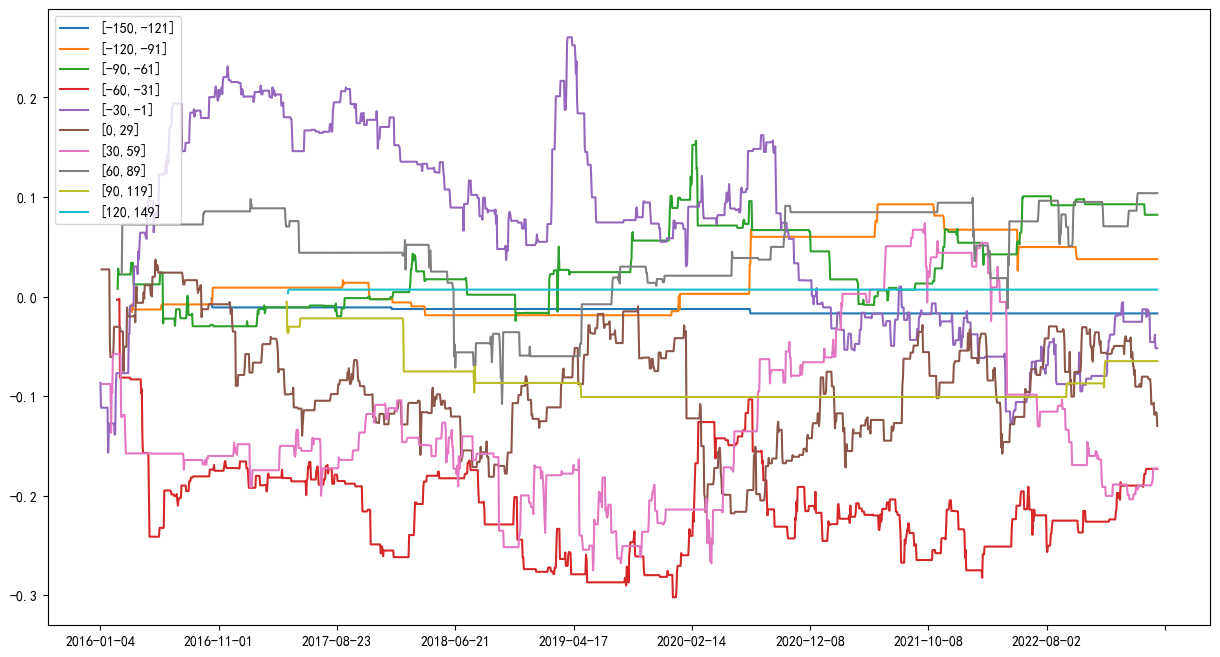

In [ ]:
for i,j in zip(range(-210,210)[::30],range(-210,210)[29::30]):
    # i = i / 10
    same_dt = set(((xy.Index_rets.loc[:,'2016-01-04':])).T[idx_name].index) & set(iCP_intraday.rolling(3).mean().shift(0)[idx_name].dropna().index)
    ts_ret = ((xy.Index_rets.loc[:,'2016-01-04':])).T[idx_name].loc[iCP_intraday.rolling(3).mean().shift(0)[idx_name][(iCP_intraday.rolling(3).mean().shift(0)[idx_name]>i) & (iCP_intraday.rolling(3).mean().shift(0)[idx_name]<j)].index&same_dt].sort_index()
    
    
    if abs(i) < 0:
        continue
    if ts_ret.shape[0] == 0:
        continue
    win_pct = ts_ret[ts_ret>0].shape[0]/ts_ret.shape[0]
    win_loss_ratio = ts_ret[ts_ret>0].mean()/ts_ret[ts_ret<0].mean()
    
    print('shrh:',[i,j], 'win%:', win_pct,'gainloss%:', win_loss_ratio)
    
    pd.Series(ts_ret.cumsum().rename(f'[{i},{j}]'),((xy.op.loc[:,'2016-01-04':]/xy.pcl.loc[:,'2016-01-04':] - 1)).T[idx_name].index).ffill().plot(legend=True,figsize=(15,8))

#### 空头

In [873]:
iCP_intraday.rolling(1).mean().T.to_csv('../NewFactor/idx_CP1.csv')